In [1]:
class AdalineGD(object):
    """ADAptive LInear NEuron 分類器

    パラメータ
    ------------
    eta : float
    　学習率（0.0 より大きく 1.0 以下の値）
    n_iter : int
    　トレーニングデータのトレーニング回数
    random_state : int
    　重みを初期化するための乱数シード

    属性
    -----------
    w_ : 1d-array
    　適合後の重み
    cost_ : list
    　各エポックでの誤差平均和のコスト関数
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ トレーニングデータに適合させる

        パラメータ
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        　トレーニングデータ
         　n_sample はサンプルの個数, n_feature は特徴量の個数
        y : array-like, shape = [n_samples]
        　目的変数

        戻り値
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            # 誤差の計算
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # コスト関数の計算
            cost = (errors**2).sum() / 2.0
            # コストの格納
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ 総入力を計算 """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """ 線形活性化関数の出力を計算 """
        return X

    def predict(self, X):
        """ １ステップ後のクラスラベルを返す """
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [2]:
import pandas as pd

df = pd.read_csv('./iris.data', header=None)
import matplotlib.pyplot as plt
import numpy as np

# 1-100行目の目的変数を抽出
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# 1-100行目の 1, 3 列目の抽出
X = df.iloc[0:100, [0, 2]].values

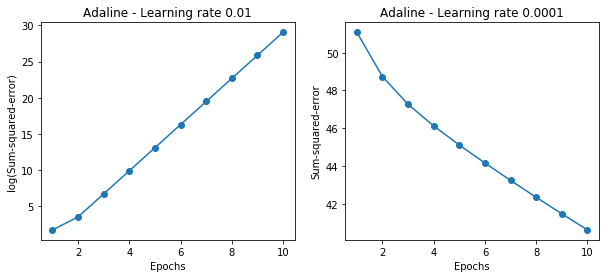

In [3]:
# 描画領域を１行２列に分割
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# 勾配降下法による ADALINE の学習（学習率 eta=0.01）
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
# エポック数とコストの関係を表す折れ線グラフのプロット（縦軸のコストは常用対数）
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
# 軸のラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
# タイトルの設定
ax[0].set_title('Adaline - Learning rate 0.01')
# 勾配降下法による ADALINE の学習（学習率 eta=0.0001）
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
# エポック数とコストの関係を表す折れ線グラフのプロット
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
# 軸のラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
# タイトルの設定
ax[1].set_title('Adaline - Learning rate 0.0001')
# 図の表示
plt.show()